#### Question 9

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


Image shape: (841, 561, 3)


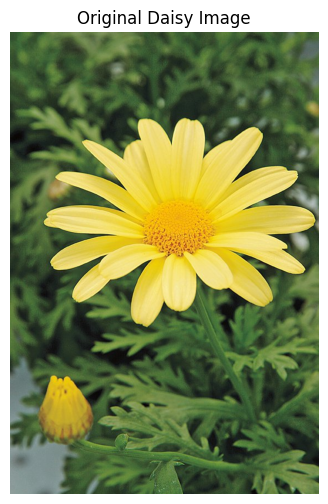

In [2]:
daisy = cv.imread('a1images/a1images/daisy.jpg')
assert daisy is not None, "Image not found!"

print(f"Image shape: {daisy.shape}")
plt.figure(figsize=(8, 6))
plt.imshow(cv.cvtColor(daisy, cv.COLOR_BGR2RGB))
plt.title('Original Daisy Image')
plt.axis('off')
plt.show()

In [3]:
# Initialize mask and models
mask = np.zeros(daisy.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define rectangle around flower (you may need to adjust coordinates)
rect = (50, 100, 550, 490)

# Apply GrabCut
cv.grabCut(daisy, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Create final mask (0 for background, 1 for foreground)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

In [4]:
# Extract foreground
foreground = daisy * mask2[:, :, np.newaxis]

# Extract background (original image where mask is 0)
background_mask = 1 - mask2  # Invert mask
background = daisy * background_mask[:, :, np.newaxis]

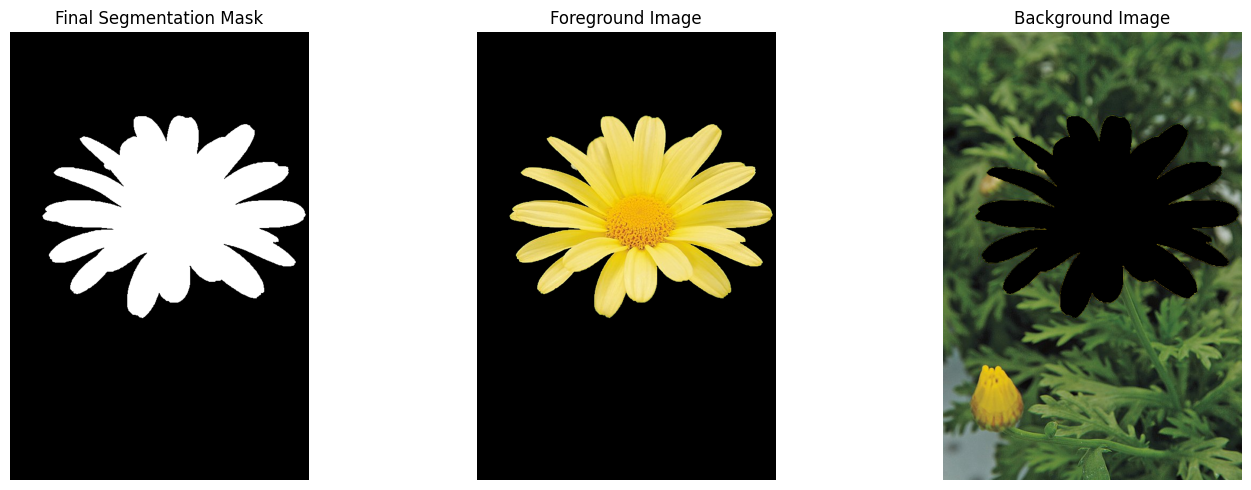

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Segmentation mask
axs[0].imshow(mask2, cmap='gray')
axs[0].set_title('Final Segmentation Mask')
axs[0].axis('off')

# Foreground image
axs[1].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
axs[1].set_title('Foreground Image')
axs[1].axis('off')

# Background image
axs[2].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
axs[2].set_title('Background Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

In [9]:
# Apply strong Gaussian blur to background
blurred_background = cv.GaussianBlur(background, (25, 25), 8)

# Combine sharp foreground with blurred background
enhanced_image = cv.add(foreground, blurred_background)

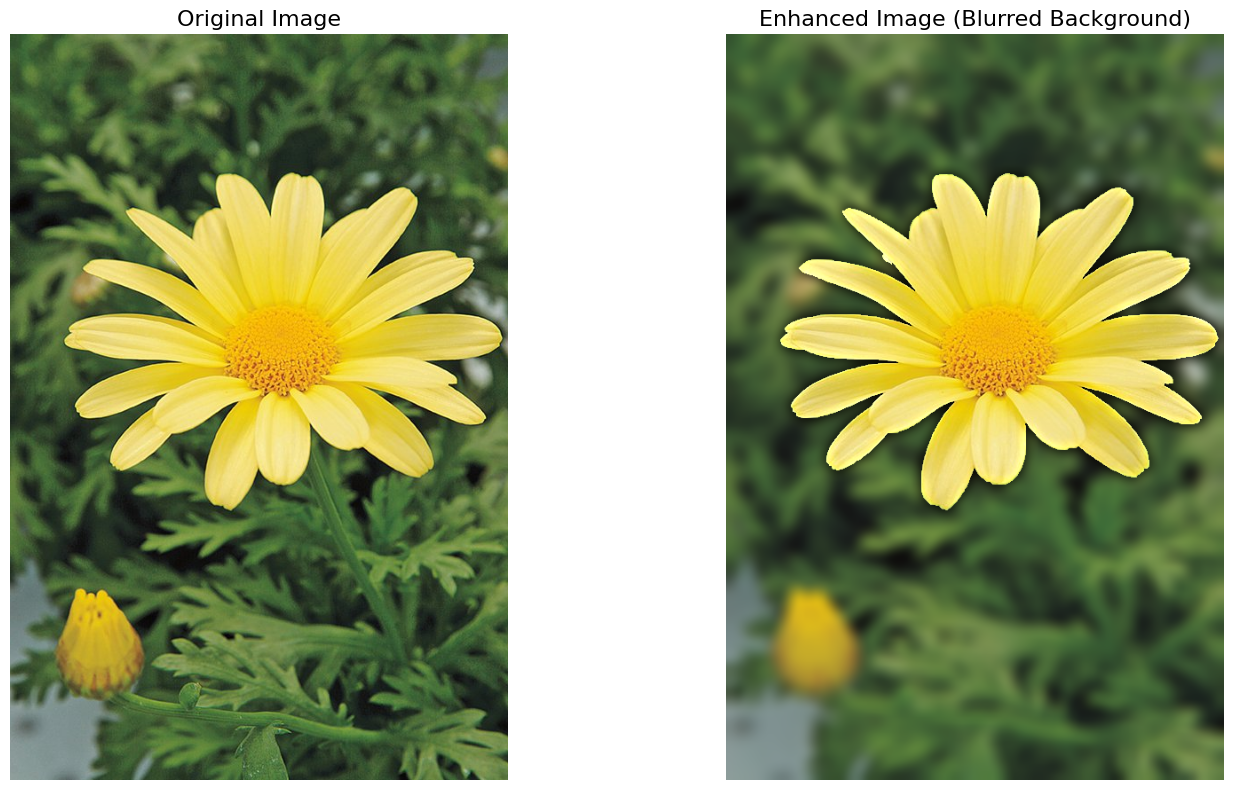

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Original image
axs[0].imshow(cv.cvtColor(daisy, cv.COLOR_BGR2RGB))
axs[0].set_title('Original Image', fontsize=16)
axs[0].axis('off')

# Enhanced image
axs[1].imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
axs[1].set_title('Enhanced Image (Blurred Background)', fontsize=16)
axs[1].axis('off')

plt.tight_layout()
plt.show()